/Users/puca/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/puca/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


ZDT1
[[  1.33061795e-08   1.00062930e+00]
 [  4.56162892e-04   9.80767886e-01]
 [  1.66969199e-03   9.60130762e-01]
 [  6.85495028e-03   9.23040144e-01]
 [  1.33577860e-02   8.87626194e-01]
 [  1.82928623e-02   8.65743490e-01]
 [  2.30332318e-02   8.62245352e-01]
 [  2.44489653e-02   8.44743750e-01]
 [  2.44489653e-02   8.44743750e-01]
 [  3.23640017e-02   8.21166060e-01]
 [  3.67605279e-02   8.09748469e-01]
 [  4.20014213e-02   7.96882597e-01]
 [  4.60832970e-02   7.86823872e-01]
 [  5.37022435e-02   7.71093057e-01]
 [  5.38423921e-02   7.69129943e-01]
 [  6.51099586e-02   7.58839738e-01]
 [  6.60614702e-02   7.52194788e-01]
 [  6.99483362e-02   7.36206609e-01]
 [  7.86972123e-02   7.20292927e-01]
 [  8.75489622e-02   7.06441693e-01]
 [  1.01420279e-01   6.82805283e-01]
 [  1.11785684e-01   6.67164472e-01]
 [  1.18579739e-01   6.56805091e-01]
 [  1.28717599e-01   6.42803430e-01]
 [  1.31362280e-01   6.38998730e-01]
 [  1.40380262e-01   6.28611746e-01]
 [  1.43545747e-01   6.22145648e-

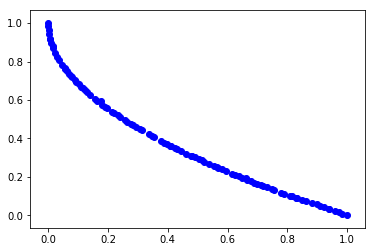

In [7]:
import array
import random
import numpy
import matplotlib.pyplot as plt
from math import sqrt
from deap import algorithms, base, benchmarks, creator, tools
%matplotlib inline

creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


toolbox.register("attr_float", uniform, low, high, dimensions)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", benchmarks.zdt1)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=low, up=high, eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=low, up=high, eta=20.0, indpb=1.0/dimensions)
toolbox.register("select", tools.selNSGA2)

def EMO(gen):
    INDIV = 100
    CXPB = 0.9
    NGEN = gen

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    pop = toolbox.population(n=INDIV)

    # applying fitness to people with invalid fitnesses
    invalid_individual = [ind for ind in pop if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_individual)
    for ind, fit in zip(invalid_individual, fitnesses):
        ind.fitness.values = fit

    # assign crowding distance
    pop = toolbox.select(pop, len(pop))

    # go through generations
    for gen in range(1, NGEN):

        # selection using dominance
        offspring = tools.selTournamentDCD(pop, len(pop))
        offspring = [toolbox.clone(ind) for ind in offspring]

        # applying crossover
        for indiv1, indiv2 in zip(offspring[::2], offspring[1::2]):
            if random.random() <= CXPB:
                toolbox.mate(indiv1, indiv2)

            #mutates based on indp prob (1/dimensions)
            toolbox.mutate(indiv1)
            toolbox.mutate(indiv2)
            del indiv1.fitness.values, indiv2.fitness.values

        # evaluating fitness of individuals with invalid fitnesses
        invalid_individual = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_individual)
        for ind, fit in zip(invalid_individual, fitnesses):
            ind.fitness.values = fit

        # Chossing a population for the next generation
        pop = toolbox.select(pop + offspring, INDIV)


    return pop

if __name__ == '__main__':

    #pop around 20 shows best multiple fronts for zdt1
    #pops 10, 20, 30, 40, 50 show great transition from convex to concave for zdt2
    # zdt3 is 0-5; gets different fronts quickly
    # zdt 6 - 60 to 100

    print ("ZDT1")
    pop1 = EMO(250)
    #print arr
    pop1.sort(key=lambda x: x.fitness.values)
    print(o1)
    front1 = numpy.array([ind.fitness.values for ind in pop1])
    plt.scatter(front1[:,0], front1[:,1], c="b")
    plt.axis("tight")
    plt.show()